# Predicting Breast Cancer

The dataset was collected from the UCI Machine Learning Repository. Studies have been [published](https://bmccancer.biomedcentral.com/articles/10.1186/s12885-017-3877-1) with this dataset to explore potential ways of predicting instances of breast cancer based on common blood tests, age and BMI. If highly accurate, breast cancer can be cheaply predicted using these common blood tests. The authors in the paper used logistic regression, random forests and support vector machine, and SVM was the most accurate model in predicting breast cancer. Let's see if we can replicate the results!

In [44]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
data = pd.read_csv('dataR2.csv')

## Data Exploration

In [46]:
data.dtypes

Age                 int64
BMI               float64
Glucose             int64
Insulin           float64
HOMA              float64
Leptin            float64
Adiponectin       float64
Resistin          float64
MCP.1             float64
Classification      int64
dtype: object

In [47]:
len(data)

116

An initial look at the dataset reveals that there are 116 unique datapoints. We can also see that all variables are numerical values. Let's take a look at each of the feature variables.

In [48]:
# graph style
sns.set_style('whitegrid')
plt.rcParams.update({'font.size':14})

## Age Group

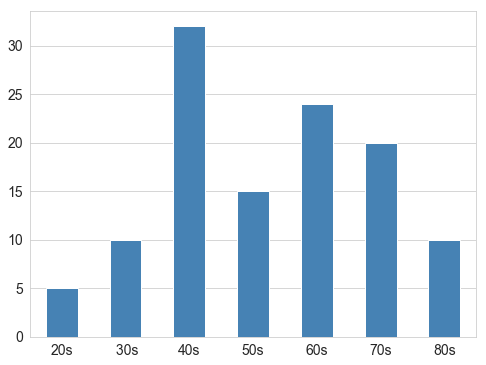

In [49]:
binned_age = pd.cut(data['Age'], bins=[19,29,39,49,59,69,79,89], include_lowest=True)
ax = binned_age.value_counts().sort_index().plot.bar(rot=0, figsize=(8,6), color='steelblue')
ax_labels = ['20s',' 30s', '40s', '50s', '60s', '70s', '80s']
ax.set_xticklabels(ax_labels)
ax.grid(axis='x')

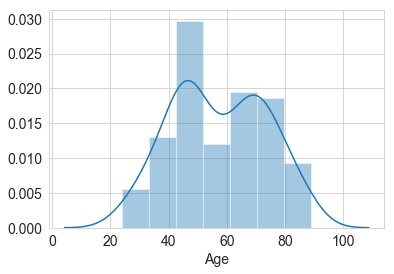

In [50]:
sns.distplot(data['Age'])

We can see a bimodal distribution here. The biggest age group for the patients is the 40s group, followed by 60s and 70s. There are relatively small number of patients in their 20s and 30s. The consensus is that the risk of getting breast cancer rises as people age. Particularly among women, most of those who get their breast cancer are diagnosed after they turn 50. It is surprising to see the 50s group under-represented in this dataset.

## BMI

In [51]:
data['BMI'].describe()

count    116.000000
mean      27.582111
std        5.020136
min       18.370000
25%       22.973205
50%       27.662416
75%       31.241442
max       38.578759
Name: BMI, dtype: float64

In [52]:
binned_bmi = pd.cut(data['BMI'], bins=[15, 18.5, 24.9, 29.9, 40], include_lowest=True)

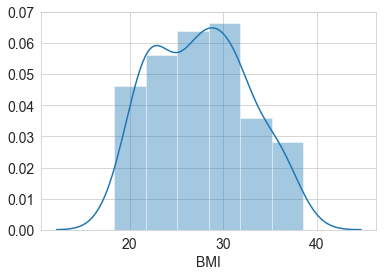

In [53]:
sns.distplot(data['BMI'])

[Text(0,0,'Underweight'),
 Text(0,0,'Healthy'),
 Text(0,0,'Overweight'),
 Text(0,0,'Obese')]

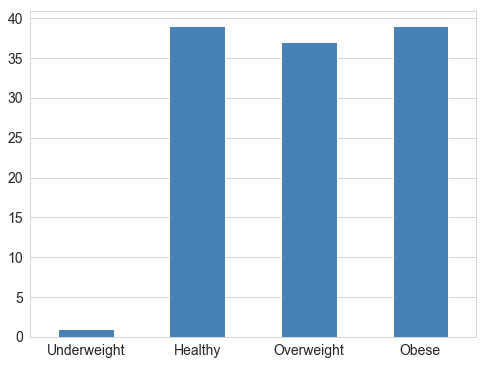

In [54]:
ax = binned_bmi.value_counts().sort_index().plot.bar(rot=0, figsize=(8,6), color='steelblue')
ax_labels = ['Underweight','Healthy', 'Overweight', 'Obese']
ax.grid(axis='x')
ax.set_xticklabels(ax_labels)

Healthy, overweight and obese patients roughly represent a third of the sample population. Only a single patient is considered underweight.

## Glucose

In [55]:
data['Glucose'].describe()

count    116.000000
mean      97.793103
std       22.525162
min       60.000000
25%       85.750000
50%       92.000000
75%      102.000000
max      201.000000
Name: Glucose, dtype: float64

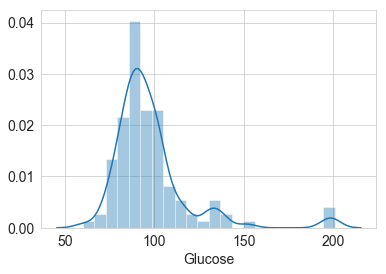

In [56]:
sns.distplot(data['Glucose'])

In [57]:
len(data[(data['Glucose']>=100) & (data['Glucose']<126)])

27

In [58]:
print('Number of patients with diabetic blood sugar levels: ' + str(len(data[data['Glucose']>=126])))
print('Number of patients with pre-diabetic blood sugar levels: '+ str(len(data[(data['Glucose']>=100) & 
                                                                                (data['Glucose']<126)])))
print('Number of patients with healthy blood sugar levels: ' + str(len(data[data['Glucose']<100])))

Number of patients with diabetic blood sugar levels: 11
Number of patients with pre-diabetic blood sugar levels: 27
Number of patients with healthy blood sugar levels: 78


The distribution plot for `Glucose` shows that the distribution of glucose levels is normal with outliers being present on the right side of the distribution plot. Fasting blood sugar level that is less than 100 mg/dL is consdered healthy. 78 patients have healthy levels while 27 have pre-diabetic levels. A small amount (n=11) patients have diabetic levels.

## Insulin

In [59]:
data['Insulin'].describe()

count    116.000000
mean      10.012086
std       10.067768
min        2.432000
25%        4.359250
50%        5.924500
75%       11.189250
max       58.460000
Name: Insulin, dtype: float64

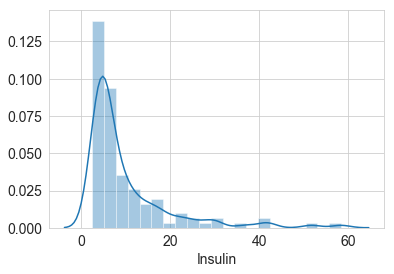

In [60]:
sns.distplot(data['Insulin'])

In [61]:
print('Number of patients with high levels of insulin: '+ str(len(data[data['Insulin']>=25])))
print('Number of patients with normal levels of insulin: ' + str(len(data[data['Insulin']<25])))

Number of patients with high levels of insulin: 9
Number of patients with normal levels of insulin: 107


Insulin level is also right skewed with the vast majority of patients having levels that are considered to be healthy (n=107).

## HOMA

HOMA stands for homeostatic model assessment and it is a method used to measure insulin resistance. There are different derivations of it, but all of the euqations include glucose and insulin levels for calculation.

In [62]:
data['HOMA'].describe()

count    116.000000
mean       2.694988
std        3.642043
min        0.467409
25%        0.917966
50%        1.380939
75%        2.857787
max       25.050342
Name: HOMA, dtype: float64

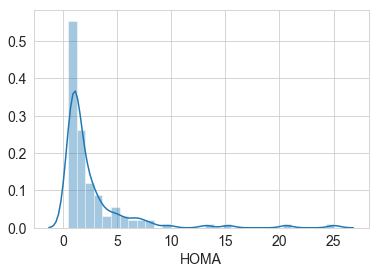

In [63]:
sns.distplot(data['HOMA'])

`HOMA` is also right skewed since both `Glucose` and `Insulin` distribution are right skewed as well.

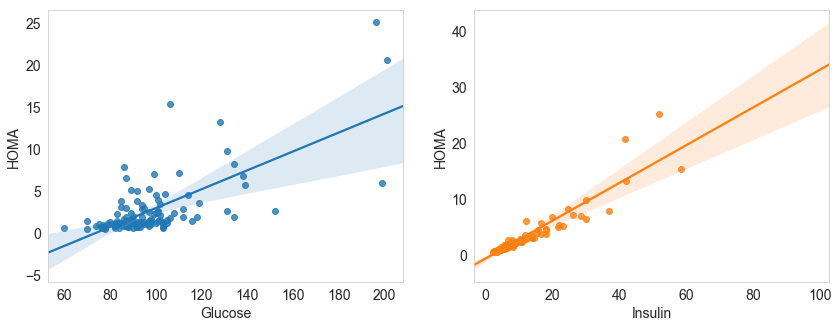

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
ax1, ax2 = axes.flatten()

sns.regplot('Glucose', 'HOMA', data, ax=ax1)
ax1.grid()
sns.regplot('Insulin', 'HOMA', data, ax=ax2)
ax2.grid()

There is a linear relationship between `Insulin` and `HOMA`, but the relationship between `Glucose` and `HOMA` is not as clear.

## Leptin

In [65]:
data['Leptin'].describe()

count    116.000000
mean      26.615080
std       19.183294
min        4.311000
25%       12.313675
50%       20.271000
75%       37.378300
max       90.280000
Name: Leptin, dtype: float64

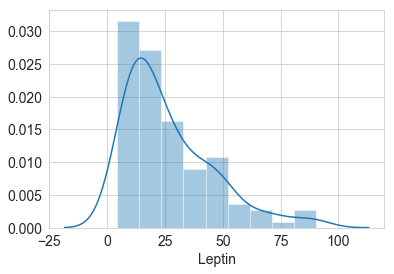

In [66]:
sns.distplot(data['Leptin'])

In [67]:
print('High serum leptin levels: ' + str(len(data[data['Leptin']>25])))
print('Normal serum leptin levels: ' + str(len(data[data['Leptin']<=25])))

High serum leptin levels: 47
Normal serum leptin levels: 69


Reference range for serum leptin levels is between 4.1 and 25 ng/mL. Most patients (n=69) have healthy leptin levels with 47 having higher than normal leptin levels. Those who are overweight or obese tend to have higher serum leptin levels.

## Adiponectin

In [68]:
data['Adiponectin'].describe()

count    116.000000
mean      10.180874
std        6.843341
min        1.656020
25%        5.474282
50%        8.352692
75%       11.815970
max       38.040000
Name: Adiponectin, dtype: float64

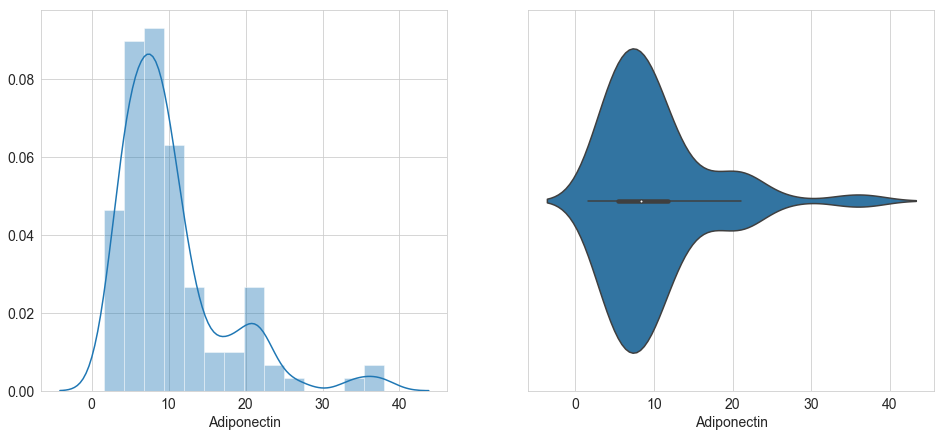

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
ax1, ax2 = axes.flatten()
sns.distplot(data['Adiponectin'], ax=ax1)
sns.violinplot(data['Adiponectin'], ax=ax2)

In [70]:
print('Normal adiponectin level: ' + str(len(data[(data['Adiponectin']>=3.5) &
                                                  (data['Adiponectin']<=22.4)])))
print('Low adiponectin level: ' + str(len(data[data['Adiponectin']<3.5])))
print('High adiponectin level: ' + str(len(data[data['Adiponectin']>22.4])))

Normal adiponectin level: 102
Low adiponectin level: 7
High adiponectin level: 7


Again, the distribution of `Adiponectin` is right-skewed. The reference range for this test is between 3.5 and 22.4 ug/mL. The vast majority (n=102) have normal adiponectin levels while 7 have low levels and 7 have high levels.

## Resistin

In [71]:
data['Resistin'].describe()

count    116.000000
mean      14.725966
std       12.390646
min        3.210000
25%        6.881763
50%       10.827740
75%       17.755207
max       82.100000
Name: Resistin, dtype: float64

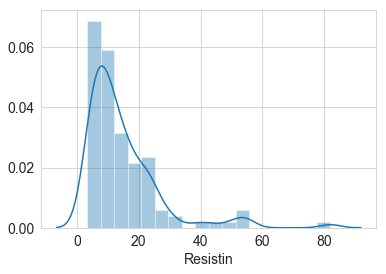

In [72]:
sns.distplot(data['Resistin'])

In [73]:
print('Normal resistin level :' + str(len(data[(data['Resistin']>=7) & (data['Resistin']<=22)])))
print('High resistin level :' + str(len(data[data['Resistin']>22])))
print('Low resistin level :' + str(len(data[data['Resistin']<7])))

Normal resistin level :63
High resistin level :22
Low resistin level :31


`Resistin` is right skewed as well. The normal range for resistin is between 7 and 22. Majority of the patients have normal resistin levels (n=63) while 22 have high levels and 31 have low levels.

## MCP.1

Monocyte chemoattractant protein 1 is a protein produced when there is a tissue injury or infection.

In [74]:
data['MCP.1'].describe()

count     116.000000
mean      534.647000
std       345.912663
min        45.843000
25%       269.978250
50%       471.322500
75%       700.085000
max      1698.440000
Name: MCP.1, dtype: float64

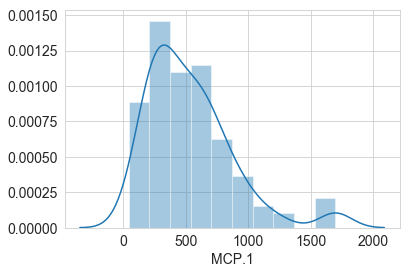

In [75]:
sns.distplot(data['MCP.1'])

`MCP.1` is right skewed as well.

## Target Variable

In [76]:
data['Classification'].value_counts(normalize=True)

2    0.551724
1    0.448276
Name: Classification, dtype: float64

In [77]:
# converting target values into 0 (healthy) and 1(patients)
def get_target(row):
    if row['Classification'] == 2:
        return 1
    else:
        return 0

data['Classification'] = data.apply(get_target, axis=1)
data['Classification'].value_counts(normalize=True)

1    0.551724
0    0.448276
Name: Classification, dtype: float64

[Text(0,0,'Patients'), Text(0,0,'Healthy')]

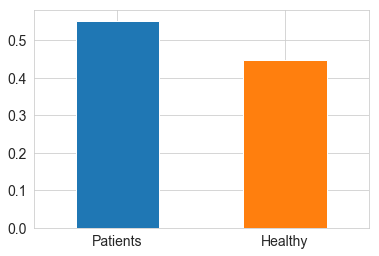

In [78]:
ax = data['Classification'].value_counts(normalize=True).plot.bar(rot=0)
ax.set_xticklabels(['Patients', 'Healthy'])

55% of patients are diagnosed with breast cancer and 45% of participants are healthy controls. The distribution of the binary target variable is reasonably balanced.

## Correlation Matrix
All of the feature variables are numerical, so let's visualize their collinearity.

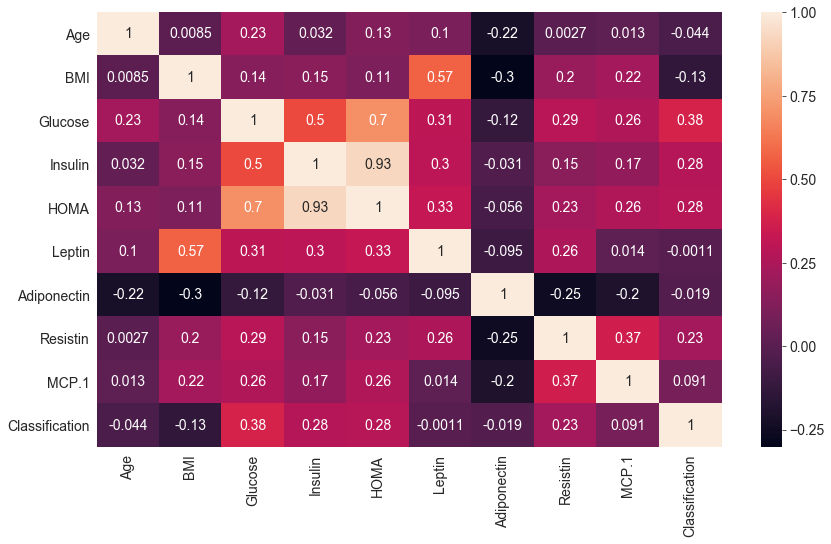

In [79]:
fig, ax = plt.subplots(figsize=(14,8))
sns.heatmap(data.corr(),
            annot=True)

Below are a list of features with collinearity.
- `BMI` and `Leptin`: Leptin is a hormone that regulates hunger, and its level can increase as people gain weight, which explains the correlation between the two variables.
- `Glucose` and `HOMA`: As mentioned, HOMA is calculated using glucose levels, so the collinearity is expected.
- `Insulin` and `Glucose`: People with high fasting glucose levels are more prone to having resistance to insulin. This causes the body to produce more insulin, explaining the positive relationship we are seeing between the two feature variables.
- `Insulin` and `HOMA`: Same as glucose and HOMA.

# Missing Values

In [80]:
data.isnull().describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116,116,116,116,116,116,116,116,116,116
unique,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False
freq,116,116,116,116,116,116,116,116,116,116


No missing values are observed in the dataset.

# Training and testing models
Now that we have explored the data, we will train and test different classification models to predict if an individual has breast cancer or not based on the features that we have. 


## Scaling variables
Some models, like Support Vector Machines, require features to be scaled, meaning that all the feature will have values from a same range of values (e.g., -1 to 1). We have multiple options when it comes to scaling our values, and since the features are not normally distributed and some contain outliers, we will use `RobustScaler` from scikit learn.

## Tuning parameters and using cross validation
We will use cross validation to evaluate the models. We will also fine tune each of the models' parameters. Luckily, we can do this using `GridSearchCV` from sklearn.

In [81]:
from sklearn.model_selection import train_test_split

#separating dataframe into two for features and target
features = data.loc[:, data.columns != 'Classification'].astype(float) #converting all features to float datatype for conversion error 
target = data.loc[:, data.columns=='Classification']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=11)

print(features.columns)
print(target.columns)


Index(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin',
       'Resistin', 'MCP.1'],
      dtype='object')
Index(['Classification'], dtype='object')


## Grid Search Function

In [82]:
#function for using grid search and fitting the training data
def grid_search_fit(pipe, param_grid):
    grid = GridSearchCV(pipe, scoring='f1', 
                        param_grid=param_grid, cv=5,
                        return_train_score=True,
                        iid=False, 
                        n_jobs=-1
                    )
    grid.fit(X_train, np.ravel(y_train))
    return grid

## Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

pipe = make_pipeline(LogisticRegression(solver='liblinear', max_iter=1000))
param_grid = {
    'logisticregression__penalty': ['l1', 'l2'],
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 50, 100, 1000]
}
tuned_clf = grid_search_fit(pipe, param_grid)

predictions = tuned_clf.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=['Healthy Control', 'Patients']))

                 precision    recall  f1-score   support

Healthy Control       0.81      0.89      0.85        19
       Patients       0.86      0.75      0.80        16

      micro avg       0.83      0.83      0.83        35
      macro avg       0.83      0.82      0.82        35
   weighted avg       0.83      0.83      0.83        35



## SVC

In [44]:
from sklearn.svm import SVC

pipe = make_pipeline(StandardScaler(),
                     SVC(max_iter=100000))
param_grid = {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'svc__kernel': ['linear', 'rbf', 'poly'],
              'svc__degree': [2, 3, 4, 5, 7, 10],
              'svc__gamma': [0.01, 0.02, 0.03, 0.04, 0.05, 0.07, 1]}
tuned_clf = grid_search_fit(pipe, param_grid)

predictions = tuned_clf.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=['Healthy Control', 'Patients']))

                 precision    recall  f1-score   support

Healthy Control       1.00      0.74      0.85        19
       Patients       0.76      1.00      0.86        16

      micro avg       0.86      0.86      0.86        35
      macro avg       0.88      0.87      0.86        35
   weighted avg       0.89      0.86      0.86        35



## Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier

pipe = make_pipeline(RandomForestClassifier(n_jobs=-1))
param_grid = {
    'randomforestclassifier__bootstrap': [True, False],
    'randomforestclassifier__max_depth': [2, 3, 5, 10],
    'randomforestclassifier__max_features': [2, 3, 4, 5],
    'randomforestclassifier__min_samples_leaf': [3, 4, 5],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__n_estimators': [100, 200, 300, 500, 1000, 1500]
}
tuned_clf = grid_search_fit(pipe, param_grid)

predictions = tuned_clf.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=['Healthy Control', 'Patients']))

                 precision    recall  f1-score   support

Healthy Control       0.94      0.89      0.92        19
       Patients       0.88      0.94      0.91        16

      micro avg       0.91      0.91      0.91        35
      macro avg       0.91      0.92      0.91        35
   weighted avg       0.92      0.91      0.91        35



In [83]:
rf_best_params = {
    'randomforestclassifier__bootstrap': True,
    'randomforestclassifier__max_depth': 2,
    'randomforestclassifier__max_features': 5,
    'randomforestclassifier__min_samples_leaf': 5,
    'randomforestclassifier__min_samples_split': 10,
    'randomforestclassifier__n_estimators': 1500
}

## XGBoost

In [120]:
from xgboost import XGBClassifier, DMatrix
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

pipe = make_pipeline(XGBClassifier(n_jobs=-1))
param_grid = {
    'xgbclassifier__learning_rate': [0.005, 0.01, 0.05, 0.1],
    'xgbclassifier__n_estimators': [300, 400, 500, 600, 700, 800, 900, 1000],
    'xgbclassifier__max_depth': [2, 3, 4, 5, 10],
    'xgbclassifier__subsample': [0.8, 0.85, 0.9, 0.95, 1],
    'xgbclassifier__colsample_bytree': [7/9, 8/9, 1],
    'xgbclassifier__gamma': [0, 1, 3, 5, 7]
}

tuned_clf = grid_search_fit(pipe, param_grid)
predictions = tuned_clf.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=['Healthy Control', 'Patients']))

                 precision    recall  f1-score   support

Healthy Control       0.89      0.84      0.86        19
       Patients       0.82      0.88      0.85        16

      micro avg       0.86      0.86      0.86        35
      macro avg       0.86      0.86      0.86        35
   weighted avg       0.86      0.86      0.86        35



In [78]:
xg_boost_best_params = {
    'xgbclassifier__colsample_bytree': 1,
    'xgbclassifier__gamma': 5,
    'xgbclassifier__learning_rate': 0.05,
    'xgbclassifier__max_depth': 3,
    'xgbclassifier__n_estimators': 600,
    'xgbclassifier__subsample': 0.85
}

From what we have observed so far, it appears that the tuned random forest performed best. Let's now move onto interpreting the model.

In [84]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(bootstrap=True,
                                max_depth=2,
                                max_features=5,
                                min_samples_leaf=5,
                                min_samples_split=10,
                                n_estimators=1500,
                                random_state=11).fit(X_train, y_train)
predictions = rf_clf.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=['Healthy Control', 'Patients']))

C:\Users\EunJin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


                 precision    recall  f1-score   support

Healthy Control       0.94      0.89      0.92        19
       Patients       0.88      0.94      0.91        16

    avg / total       0.92      0.91      0.91        35



We've tried three classification models for this project - logistic regression, support vector classifier, XGBoost and Random Forest. The results on our test dataset shows that Random Forest performed the best with scores 92%, 91% and 91% for precision, recall and f1-score, respecitvely.

# Model Interpretation

One of the most important aspect of machine learning in healthcare is the interpretability of the predictions - users, often clinicians and researchers, will want to know why the model made the predictions it made. Here, we will attempt to do some interpretation of the Random Forest model we used.

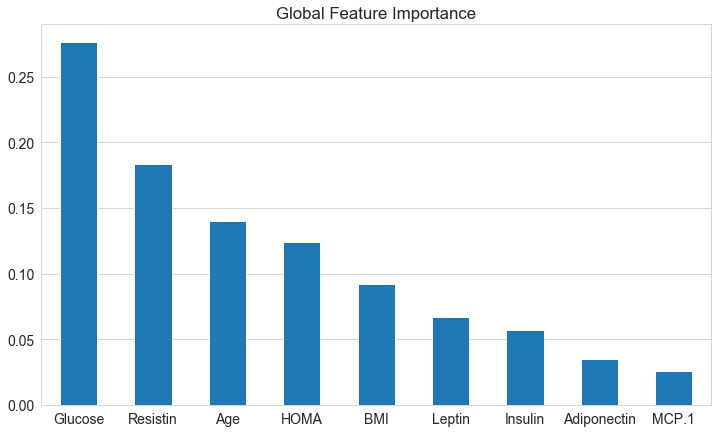

In [85]:
fig, ax = plt.subplots(figsize=(12,7))

feature_importances = pd.DataFrame(rf_clf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)
feature_importances.plot.bar(rot=0, ax=ax)
ax.set_title('Global Feature Importance')
ax.get_legend().remove()
ax.grid(axis='x')

A common way of seeing which features the model puts its general emphasis on, we can begin at feature importance. Our analysis shows that the model put `Glucose` as the most influential feature, followed by `Resistin`, `Age`, and `HOMA`.

## SHAP
Although global feature importance is intuitive and simple to understand, it does not provide much context in why the model made the predictions in made. In particular, we cannot pinpoint on each classification decisions and delve into how the features played a factor in the prediction. To achieve this, we will use SHAP (SHapley Additive exPlanations), which is 'a unified approach to explain the output of any machine learning model'. For more information, refer to this [github page](https://github.com/slundberg/shap#citations).

In [90]:
import shap

shap_explainer = shap.TreeExplainer(rf_clf)
test_shap_vals = shap_explainer.shap_values(X_test)

shap.initjs()

shap.force_plot(shap_explainer.expected_value[0],
                test_shap_vals[0], X_test)

The interactive graph above shows how each of the features have affected the predictions. The numbers indicate the value of the features and the height/space for each of the features indicate the amount of impact the feature had on swaying the prediction to either positive(red) or negative(blue).

Note: the SHAP visual may not render from GitHub. If this occurs, please go to the [nbviewer](https://nbviewer.jupyter.org/) and enter in the url of the notebook page - https://github.com/EngineBae/predicting_breast_cancer/blob/master/predicting_breast_cancer.ipynb to view the notebook.